<a href="https://colab.research.google.com/github/HermanMoreno98/Centec_Python/blob/main/S01_4_Data_Cleaning_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [ ]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data[0] = None

In [ ]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

NA handling methods

* dropna
* fillna
* isnull
* notnull

In [ ]:
data = pd.Series([1,np.nan,3.5,np.nan,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data = pd.DataFrame([[1.,6.5,3.],[1.,np.nan,np.nan],
                     [np.nan,np.nan,np.nan],[np.nan,6.5,3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
cleaned = data.dropna()

In [ ]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [ ]:
#Drop only rows that are all NaN
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
#To drop columns in the same way
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=1,how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
df = pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,-0.090903,0.100587,-0.135880
1,-0.556833,1.340926,0.436008
2,-1.401069,-0.233424,0.393153
3,0.426966,-0.271323,-0.918056
4,0.320507,0.042376,-0.659483
5,-0.822913,-0.328012,1.182109
6,1.400118,0.878880,-0.062815


In [ ]:
df.iloc[:4,1] = np.nan

In [ ]:
df.iloc[:2,2] = np.nan

In [ ]:
df

,0,1,2
0,-0.090903,NaN,NaN
1,-0.556833,NaN,NaN
2,-1.401069,NaN,0.393153
3,0.426966,NaN,-0.918056
4,0.320507,0.042376,-0.659483
5,-0.822913,-0.328012,1.182109
6,1.400118,0.878880,-0.062815


In [ ]:
df.dropna()

,0,1,2
4,0.431674,0.542681,-0.990693
5,0.345897,-0.740353,-0.303978
6,-1.510009,-1.954752,0.408213


In [ ]:
df.fillna(0)

,0,1,2
0,-0.042103,0.000000,0.000000
1,-1.291951,0.000000,0.000000
2,0.920453,0.000000,-0.650301
3,-0.151472,0.000000,0.381648
4,-0.500631,0.087982,-0.485246
5,-1.978220,-0.232388,0.975081
6,-1.108822,-1.397161,-0.033583


In [ ]:
#Por posicion de columna
df.fillna({1:0.5,2:0})

,0,1,2
0,-0.042103,0.500000,0.000000
1,-1.291951,0.500000,0.000000
2,0.920453,0.500000,-0.650301
3,-0.151472,0.500000,0.381648
4,-0.500631,0.087982,-0.485246
5,-1.978220,-0.232388,0.975081
6,-1.108822,-1.397161,-0.033583


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,0,1,2
0,-0.090903,0.000000,0.000000
1,-0.556833,0.000000,0.000000
2,-1.401069,0.000000,0.393153
3,0.426966,0.000000,-0.918056
4,0.320507,0.042376,-0.659483
5,-0.822913,-0.328012,1.182109
6,1.400118,0.878880,-0.062815


In [ ]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

Fillna function arguments

* value
* method
* axis
* inplace
* limit

In [ ]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

# Data Transformation

## Removing duplicates

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
#Method duplicated returns a boolean Series indicating whether each row is duplicate
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [ ]:
data.drop_duplicates(["k1","k2"],keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming data using a function or mapping

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
         'Pastrami', 'corned beef', 'Bacon',
         'pastrami', 'honey ham', 'nova lox'],
        'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
      'bacon': 'pig',
      'pulled pork': 'pig',
      'pastrami': 'cow',
      'corned beef': 'cow',
      'honey ham': 'pig',
      'nova lox': 'salmon'
}

In [ ]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
data["animal"] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [ ]:
data["food"].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Apply()

In [ ]:
# importing pandas as pd
import pandas as pd
 
# Creating the DataFrame
df = pd.DataFrame({'Date':['10/2/2011', '11/2/2011', '12/2/2011', '13/2/2011'],
                    'Event':['Music', 'Poetry', 'Theatre', 'Comedy'],
                    'Cost':[10000, 5000, 15000, 2000]})
 
# Print the dataframe
print(df)

# using apply function to create a new column
df['Discounted_Price'] = df.apply(lambda row: row.Cost -
                                  (row.Cost * 0.1), axis = 1)
 
# Print the DataFrame after addition
# of new column
print(df)

### Directly()

In [ ]:
import pandas as pd
 
# Creating the DataFrame
df = pd.DataFrame({'Date':['10/2/2011', '11/2/2011', '12/2/2011', '13/2/2011'],
                    'Event':['Music', 'Poetry', 'Theatre', 'Comedy'],
                    'Cost':[10000, 5000, 15000, 2000]})
 
# Create a new column 'Discounted_Price' after applying
# 10% discount on the existing 'Cost' column.
 
# create a new column
df['Discounted_Price'] = df['Cost'] - (0.1 * df['Cost'])
 
# Print the DataFrame after
# addition of new column
print(df)

### Map()

In [ ]:
data = {
    "name": ["John", "Ted", "Dev", "Brad", "Rex", "Smith", "Samuel", "David"],
    "salary": [10000, 20000, 50000, 45500, 19800, 95000, 5000, 50000]
}
# create dataframe from data dictionary
df = pd.DataFrame(data)
# print the dataframe
df.head()

In [ ]:
def salary_stats(value):
    if value < 10000:
        return "very low"
    elif 10000 <= value < 25000:
        return "low"
    elif 25000 <= value < 40000:
        return "average"
    elif 40000 <= value < 50000:
        return "better"
    elif value >= 50000:
        return "very good"
 
df['salary_stats'] = df['salary'].map(salary_stats)
df.head()

### List comprehension

In [ ]:
# importing pandas as pd
import pandas as pd
 
# Creating the dataframe
df = pd.DataFrame({'Date' : ['11/8/2011', '11/9/2011', '11/10/2011',
                                        '11/11/2011', '11/12/2011'],
                'Event' : ['Music', 'Poetry', 'Music', 'Comedy', 'Poetry']})
 
# Print the dataframe
print(df)

In [ ]:
df["Price"] = [1500 if x=="Music" else 800 for x in df["Event"]]
df

### Lambda function

In [ ]:
lambda_func = lambda x: x**2 # Funcion que recoge un número entero y devuelve su cuadrado
lambda_func(3) # Retorna 9

In [ ]:
lambda_func = lambda x: True if x**2 >= 10 else False
lambda_func(3) # Retorna False
lambda_func(4) # Retorna True

## Replacing Values

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Renaming axis indexes

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
       index=['Ohio', 'Colorado', 'New York'],
       columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
data.index = data.index.map(lambda x: x[:4].upper())
data

In [ ]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [ ]:
data.rename(index={"OHIO":"INDIANA"},
            columns={"three":"peekaboo"})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [ ]:
data.rename(index={"OHIO":"INDIANA"},inplace=True)

In [ ]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretization and Binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
#Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [ ]:
pd.cut(ages,[18,26,36,61,100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [ ]:
#You can also pass your own bin names by passing a list or array to the labels option:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [ ]:
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [ ]:
#If you pass an integer number of bins to cut instead of explicit bin edges, it will com‐ pute equal-length bins based on the minimum and maximum values in the data.
# Uniform distirbuted
data = np.random.rand(20)
pd.cut(data,4,precision=2)

[(0.73, 0.97], (0.24, 0.49], (0.24, 0.49], (0.49, 0.73], (0.0009, 0.24], ..., (0.0009, 0.24], (0.73, 0.97], (0.73, 0.97], (0.0009, 0.24], (0.73, 0.97]]
Length: 20
Categories (4, interval[float64, right]): [(0.0009, 0.24] < (0.24, 0.49] < (0.49, 0.73] <
                                           (0.73, 0.97]]

In [ ]:
#A closely related function, qcut, bins the data based on sample quantiles. Normally distributed
data = np.random.randn(1000)
cats = pd.qcut(data,4) #Cut into quartiels
cats

[(0.667, 3.223], (0.00392, 0.667], (-3.159, -0.654], (-3.159, -0.654], (0.00392, 0.667], ..., (0.00392, 0.667], (-3.159, -0.654], (0.667, 3.223], (-0.654, 0.00392], (0.00392, 0.667]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.159, -0.654] < (-0.654, 0.00392] < (0.00392, 0.667] <
                                           (0.667, 3.223]]

In [ ]:
pd.value_counts(cats)

(-3.159, -0.654]     250
(-0.654, 0.00392]    250
(0.00392, 0.667]     250
(0.667, 3.223]       250
dtype: int64

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.00392, 1.265], (0.00392, 1.265], (-3.159, -1.239], (-3.159, -1.239], (0.00392, 1.265], ..., (0.00392, 1.265], (-1.239, 0.00392], (1.265, 3.223], (-1.239, 0.00392], (0.00392, 1.265]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.159, -1.239] < (-1.239, 0.00392] < (0.00392, 1.265] <
                                           (1.265, 3.223]]

## Detecting and Filtering Outliers

In [ ]:
#Generate a dataframe with 1000 rows and 4 columns and random values
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.053950,0.023825,-0.032734,-0.034505
std,0.942574,0.996492,1.002091,1.004995
min,-3.313496,-3.383399,-3.589350,-3.422719
25%,-0.597268,-0.633408,-0.701290,-0.705549
50%,0.030586,0.039039,-0.010231,-0.016617
75%,0.700429,0.653547,0.625060,0.645243
max,2.941049,3.009278,3.744262,4.011081


In [ ]:
#Suppose you wanted to find values in one of the columns exceeding 3 in absolute value
col = data[2]

col[np.abs(col) > 3]

163   -3.066394
212   -3.414654
721    3.744262
842   -3.589350
Name: 2, dtype: float64

In [ ]:
#To select all rows having a value exceeding 3 or –3, you can use the any method on a boolean DataFrame
data[(np.abs(data) > 3).any(1)]

<ipython-input-112-60290728511d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data[(np.abs(data) > 3).any(1)]


,0,1,2,3
116,0.083156,-3.017855,-0.559620,-0.409378
163,0.330820,0.429442,-3.066394,-0.272472
199,-0.562857,-0.200229,-0.671493,3.063632
212,1.576619,0.819758,-3.414654,-0.670605
351,-1.688978,-1.680466,-0.277352,3.179941
383,0.167113,3.009278,0.824127,0.938955
454,0.248545,-0.079382,0.336435,-3.334932
471,0.154337,0.972810,1.806939,4.011081
721,0.067922,-2.207239,3.744262,-0.456278
807,0.382297,0.065391,-0.243133,-3.422719


## Computing indicator/dummy variable

In [ ]:
df = pd.DataFrame({"key":["b","b","a","c","a","b"],
                   "data1":range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(df["key"])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [ ]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## String manipulation

In [ ]:
val = "a,b,guido"
val

'a,b,guido'

In [ ]:
val.split(",")

['a', 'b', 'guido']

In [ ]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

In [ ]:
# These substrings could be concatenated together with a two-colon delimiter using addition
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

In [ ]:
"::".join(pieces)

'a::b::guido'

In [ ]:
"guido" in val

True

In [ ]:
val.index(",")

1

In [ ]:
val.find(":") #not found

-1

In [ ]:
val.index(":")

ValueError: ignored

In [ ]:
val.count(",")

2

In [ ]:
val.replace(",","::")

'a::b::guido'

In [ ]:
val.replace(",","")

'abguido'

Python built-in string methods

|Argument|Description|
|--------|-----------|
|count|Return the number of non-overlapping occurrences of substring in the string.|
|endswith|ReturnsTrueif string ends with suffix.|
|startswidth|ReturnsTrueif string starts with prefix.|
|join|Use string as delimiter for concatenating a sequence of other strings.|
|index|Return position of first character in substring if found in the string; raises ValueError if not found.|
|find|Return position of first character of first occurrence of substring in the string; like index, but returns –1 if not found.|
|rfind|Return position of first character of last occurrence of substring in the string; returns –1 if not found.|
|replace|Replace occurrences of string with another string.|
|strip,rstrip,lstrip|Trim whitespace, including newlines; equivalent to x.strip() (and rstrip, lstrip, respectively) for each element.|
|split|Break string into list of substrings using passed delimiter.|
|lower|Convert alphabet characters to lowercase.|
|upper|Convert alphabet characters to uppercase.|
|casefold|Convert characters to lowercase, and convert any region-specific variable character combinations to a common comparable form.|
|ljust,rjust|Left justify or right justify, respectively; pad opposite side of string with spaces (or some other fill character) to return a string with a minimum width.|

## Regular expressions


Regular expressions provide a flexible way to search or match (often more complex) string patterns in text.

In [ ]:
import re

In [ ]:
text = "foo bar\t baz \tqux"
text

'foo bar\t baz \tqux'

In [ ]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
regex.findall(text)

[' ', '\t ', ' \t']

In [ ]:
text = """Dave dave@google.com
    Steve steve@gmail.com
    Rob rob@gmail.com
    Ryan ryan@yahoo.com
    """

In [ ]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [ ]:
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

## Vectorized String functions in pandas

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
       'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [ ]:
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [ ]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [ ]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

# Data wrangling: Join, Combine and Reshape

## Hierarchical indexing


Hierarchical indexing is an important feature of pandas that enables you to have mul‐ tiple (two or more) index levels on an axis. 

In [ ]:
data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],[1,2,3,1,3,1,2,2,3]])
data

a  1    0.242931
   2   -1.029336
   3    0.573278
b  1    0.637999
   3    0.077887
c  1    0.032389
   2   -1.658541
d  2    0.253838
   3    0.171322
dtype: float64

In [ ]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
data["b"]

1    0.637999
3    0.077887
dtype: float64

In [ ]:
data["b":"c"]

b  1    0.637999
   3    0.077887
c  1    0.032389
   2   -1.658541
dtype: float64

In [ ]:
data.loc[["b","d"]]

b  1    0.637999
   3    0.077887
d  2    0.253838
   3    0.171322
dtype: float64

In [ ]:
data.loc[:,2]

a   -1.029336
c   -1.658541
d    0.253838
dtype: float64

In [ ]:
#Forming a pivot table
data.unstack()

,1,2,3
a,0.242931,-1.029336,0.573278
b,0.637999,NaN,0.077887
c,0.032389,-1.658541,NaN
d,NaN,0.253838,0.171322


In [ ]:
#The inverse operation of unstack is stack
data.unstack().stack()

a  1    0.242931
   2   -1.029336
   3    0.573278
b  1    0.637999
   3    0.077887
c  1    0.032389
   2   -1.658541
d  2    0.253838
   3    0.171322
dtype: float64

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
frame.index.names = ["key1","key2"]

In [ ]:
frame.columns.names = ["state","color"]

In [ ]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
frame["Ohio"]

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

## Reordering and Sorting Levels

In [ ]:
#The swaplevel takes two level numbers or names and returns a new object with the levels interchanged (but the data is otherwise unaltered)
frame.swaplevel("key1","key2")

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [ ]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

## Summary Statistics by Level

In [ ]:
frame.sum(level="key2")

<ipython-input-33-c9ed4766015a>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level="key2")


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [ ]:
frame.sum(level="color",axis=1)

<ipython-input-34-5d1590e49941>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level="color",axis=1)


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## Indexing with a DataFrame's columns

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd':[0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
frame2 = frame.set_index(["c","d"])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [ ]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [ ]:
frame2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('one', 0) to ('two', 3)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       7 non-null      int64
 1   b       7 non-null      int64
dtypes: int64(2)
memory usage: 554.0+ bytes


In [ ]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Combining and Merging Datasets

* ***pandas.merge*** connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
* ***pandas.concat*** concatenates or “stacks” together objects along an axis.
* The ***combine_first*** instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

### Database-Style DataFrame Joins

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

In [ ]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
# Many to one
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
pd.merge(df1,df2,on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})

In [ ]:
print(df3)
print(df4)

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6
  rkey  data2
0    a      0
1    b      1
2    d      2


In [ ]:
pd.merge(df3,df4,left_on="lkey",right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [ ]:
pd.merge(df1,df2,how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})

In [ ]:
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4


In [ ]:
#Many to many relationship
pd.merge(df1,df2,on="key",how="left")

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
   'key2': ['one', 'two', 'one'],
   'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
   'key2': ['one', 'one', 'one', 'two'],
   'rval': [4, 5, 6, 7]})

In [ ]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [ ]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [ ]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [ ]:
print(left1)
print(right1)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


In [ ]:
pd.merge(left1,right1,left_on="key",right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1,right1,left_on="key",right_index=True,how="outer")

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [ ]:
#With hierarchically indexed data
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio','Nevada', 'Nevada'],
  'key2': [2000, 2001, 2002, 2001, 2002],
  'data': np.arange(5.)})

righth = pd.DataFrame(np.arange(12).reshape((6, 2)),index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                                                           [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])

In [ ]:
print(lefth)
print(righth)

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


In [ ]:
pd.merge(lefth,righth,left_on=["key1","key2"],right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [ ]:
pd.merge(lefth,righth,left_on=["key1","key2"],right_index=True,how="outer")

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
       index=['a', 'c', 'e'],
       columns=['Ohio', 'Nevada'])

right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
       index=['b', 'c', 'd', 'e'],
       columns=['Missouri', 'Alabama'])

In [ ]:
print(left2)
print(right2)

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0


In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
#DataFrame has a convenient join instance for merging by index. 
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
      index=['a', 'c', 'e', 'f'],
      columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [ ]:
left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [ ]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis

In [ ]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [ ]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [ ]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


## Reshaping and Pivoting

* stack: This “rotates” or pivots from the columns in the data to the rows
* unstack: This pivots from the rows into the columns

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
       index=pd.Index(['Ohio', 'Colorado'], name='state'),
       columns=pd.Index(['one', 'two', 'three'],
       name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
result.unstack("state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


## Pivoting "Long" to "Wide" Format

In [ ]:
data = pd.read_csv("macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [ ]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
columns

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')

In [ ]:
data = data.reindex(columns=columns)
data

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [ ]:
data.index = periods.to_timestamp('D', 'end')

In [ ]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

<ipython-input-113-e6bc355eb51e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = ldata.pivot('date', 'item', 'value')


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

## Pivoting “Wide” to “Long” Format

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
       'A': [1, 2, 3],
       'B': [4, 5, 6],
       'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [ ]:
melted = pd.melt(df,["key"])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

<ipython-input-117-ace35aa88b6e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reshaped = melted.pivot('key', 'variable', 'value')


variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [ ]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


# Data Aggregation and Group Operations

## GroupBy Mechanics

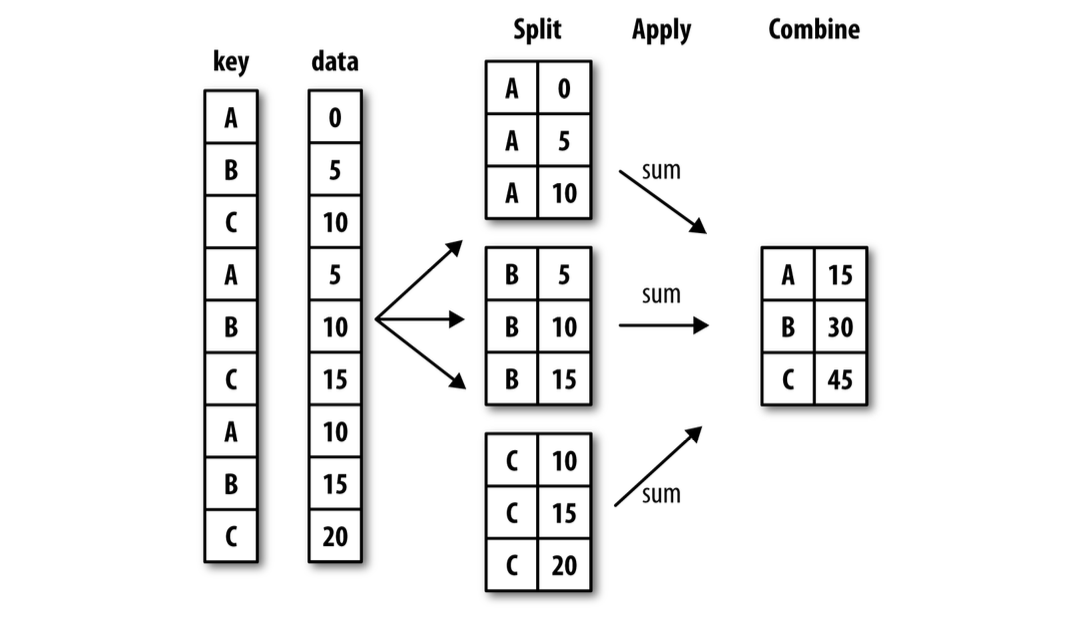

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                  'key2' : ['one', 'two', 'one', 'two', 'one'],
                  'data1' : np.random.randn(5),
                  'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.035358,0.997064
1,a,two,0.624935,0.612648
2,b,one,0.385932,0.610105
3,b,two,-0.425295,0.827016
4,a,one,-0.894159,-0.810607


In [ ]:
grouped = df["data1"].groupby(df["key1"])
grouped

In [ ]:
grouped.mean()

key1
a    0.255378
b   -0.019682
Name: data1, dtype: float64

In [ ]:
means = df["data1"].groupby([df["key1"],df["key2"]]).mean()
means

key1  key2
a     one     0.070599
      two     0.624935
b     one     0.385932
      two    -0.425295
Name: data1, dtype: float64

In [ ]:
means.unstack()

key2,one,two
key1,,
a,0.070599,0.624935
b,0.385932,-0.425295


In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [ ]:
df["data1"].groupby([states,years]).mean()

California  2005    0.624935
            2006    0.385932
Ohio        2005    0.305031
            2006   -0.894159
Name: data1, dtype: float64

In [ ]:
df.groupby("key1").mean()

<ipython-input-128-dee2db980cb3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("key1").mean()


,data1,data2
key1,,
a,0.255378,0.266368
b,-0.019682,0.718560


In [ ]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                    
a    one   0.070599  0.093228
     two   0.624935  0.612648
b    one   0.385932  0.610105
     two  -0.425295  0.827016

In [ ]:
df.groupby(["key1","key2"]).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [ ]:
df.groupby("key1")["data1"]

In [ ]:
df.groupby("key1")[["data2"]]

In [ ]:
df.groupby(["key1","key2"])[["data2"]].mean()

data2
key1 key2          
a    one   0.093228
     two   0.612648
b    one   0.610105
     two   0.827016

In [ ]:
s_grouped = df.groupby(["key1","key2"])["data2"]
s_grouped

In [ ]:
s_grouped.mean()

key1  key2
a     one     0.093228
      two     0.612648
b     one     0.610105
      two     0.827016
Name: data2, dtype: float64

## Data Aggregation

In [ ]:
df

,key1,key2,data1,data2
0,a,one,1.035358,0.997064
1,a,two,0.624935,0.612648
2,b,one,0.385932,0.610105
3,b,two,-0.425295,0.827016
4,a,one,-0.894159,-0.810607


In [ ]:
grouped = df.groupby("key1")

In [ ]:
grouped["data1"].quantile(0.9)

key1
a    0.953273
b    0.304809
Name: data1, dtype: float64

In [ ]:
#To use your own aggregation functions, pass any function that aggregates an array to the aggregate or agg method:
def peak_to_peak(arr):
  return arr.max() - arr.min()

In [ ]:
grouped.agg(peak_to_peak)

<ipython-input-142-b1217dab83b0>:1: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(peak_to_peak)


,data1,data2
key1,,
a,1.929517,1.807671
b,0.811227,0.216910


In [ ]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.255378  1.016459 -0.894159 -0.134612  0.624935  0.830146   
b      2.0 -0.019682  0.573624 -0.425295 -0.222488 -0.019682  0.183125   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.035358   3.0  0.266368  0.952287 -0.810607 -0.098980  0.612648   
b     0.385932   2.0  0.718560  0.153379  0.610105  0.664333  0.718560   

                          
           75%       max  
key1                      
a     0.804856  0.997064  
b     0.772788  0.827016

In [ ]:
tips = pd.read_csv("tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips["tip_pct"] = tips["tip"]/tips["total_bill"]

In [ ]:
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


In [ ]:
grouped = tips.groupby(["day","smoker"])

In [ ]:
grouped_pct = grouped["tip_pct"]

In [ ]:
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
grouped_pct.agg(["mean","std",peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [ ]:
grouped_pct.agg([("foo","mean"),("bar",np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
functions = ["count","mean","max"]

In [ ]:
result = grouped["tip_pct","total_bill"].agg(functions)
result

<ipython-input-155-9bdb5a266546>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped["tip_pct","total_bill"].agg(functions)


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [ ]:
result["tip_pct"]

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [ ]:
#As before, a list of tuples with custom names can be passed:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-158-417b40324039>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [ ]:
#Now, suppose you wanted to apply potentially different functions to one or more of the columns.
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [ ]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [ ]:
def top(df, n=5, column='tip_pct'):
  return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [ ]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [ ]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [ ]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [ ]:
#Quantile and Bucket Analysis
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame.head()

,data1,data2
0,2.103971,0.617843
1,0.128846,1.424456
2,0.407126,-0.412117
3,-0.812564,1.751625
4,0.745947,0.792779


In [ ]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0       (1.583, 3.165]
1     (0.00114, 1.583]
2     (0.00114, 1.583]
3    (-1.581, 0.00114]
4     (0.00114, 1.583]
5       (1.583, 3.165]
6     (0.00114, 1.583]
7    (-1.581, 0.00114]
8     (-3.169, -1.581]
9     (0.00114, 1.583]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.169, -1.581] < (-1.581, 0.00114] < (0.00114, 1.583] <
                                           (1.583, 3.165]]

In [ ]:
def get_stats(group):
  return {'min': group.min(), 'max': group.max(),'count': group.count(), 'mean': group.mean()}

In [ ]:
grouped = frame.data2.groupby(quartiles)

In [ ]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.169, -1.581]",-1.985541,2.413924,49.0,-0.053609
"(-1.581, 0.00114]",-3.316694,2.954963,447.0,-0.065296
"(0.00114, 1.583]",-3.599976,2.937066,454.0,-0.073019
"(1.583, 3.165]",-2.433309,1.640798,50.0,-0.022320


In [ ]:
#Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

In [ ]:
grouped = frame.data2.groupby(grouping)

In [ ]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.668543,2.413924,100.0,0.009923
1,-3.316694,2.459722,100.0,-0.092063
2,-2.373254,2.954963,100.0,-0.088669
3,-2.756210,2.622049,100.0,-0.013341
4,-2.361194,2.671601,100.0,-0.154366
5,-2.550306,1.807265,100.0,-0.173834
6,-3.599976,2.828369,100.0,0.029045
7,-2.748201,2.411041,100.0,-0.128855
8,-1.773218,2.937066,100.0,0.059837


## Pivot tables


A pivot table is a data summarization tool frequently found in spreadsheet programs and other data analysis software. 

In [ ]:
#Returning to the tipping dataset, suppose you wanted to compute a table of group means (the default pivot_table aggregation type)
tips.pivot_table(index=['day', 'smoker'])

<ipython-input-182-41212419e733>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tips.pivot_table(index=['day', 'smoker'])


size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [ ]:
#To use a different aggregation function, pass it to aggfunc.
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [ ]:
#If some combinations are empty (or otherwise NA), you may wish to pass a fill_value:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

## Cross-Tabulation

A cross-tabulation (or crosstab for short) is a special case of a pivot table that com‐ putes group frequencies.

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244